# Digital filters design
based on:
1. coursera's "Digital Signal Processing Specialization" by **Paolo Prandoni** and **Martin Vetterli**
2. https://docs.scipy.org/doc/scipy/tutorial/fft.html#fast-fourier-transforms
3. https://docs.scipy.org/doc/scipy/reference/signal.html


## Intro

### Basic theory

#### The convolution theorem
For LTI systems, if the input is a complex exponential in some frequency, the output will be a complex exponential in the same frequency, scaled by some **gain** and with some **phase delay**.

The gain and the phase delay will be determined by the DTFT of the system impulse response.
 * you can find DTFT basic explenation [here](https://app.reviewnb.com/vyohai/tutorials/blob/main/scipy%2FBasic%20Fourier%20analysis%20-%20DFT.ipynb)


$y[n]=H(e^{j\omega_{0}})\cdot e^{j\omega_{0}}$

* $H=DTFT\{h\}=\sum_{k=-\infty}^{\infty}h[k]\cdot e^{-j\omega_{0}\cdot k}$
* $H(e^{j\omega_{0}})=A\cdot e^{\theta}\implies H\{e^{j\omega_{0}\cdot n}\}=A\cdot e^{j(\omega_{0}\cdot n+\theta)}$

#### Convolution
Defined by:

$x[n]*h[n]=\sum_{k=-\infty}^{\infty} x[k]\cdot h[n-k]$

#### LTI(Linear-Time-Invariant) filters
Will deal with filters from the LTI(and somtimes casual) systems subset.

**Linearity** - $H\{\alpha\cdot x_{1}[n]+\beta\cdot x_{2}[n]\}==\alpha\cdot H\{x_{1}[n]\}+\beta\cdot H\{x_{2}[n]\}$

**Time-invariance** - $y[n]=H\{x[n]\}\iff y[n-n_{0}]=H\{x[n-n_{0}]\}$

**Casuality** - $y[n]=H\{x[n],x[n-1],...,y[n-1],y[n-2],...\}$ (dependece only on previous inputs\outputs)

#### Impulse response
Will call $h[n]$, the $H$ system impulse response:

$h[n]=H\{\delta[n]\}$

For LTI systems, we can use the impulse response to find the output for every input,as such:

$y[n]=x[n]*h[n]$

* x[n] - some input
* y[n] - the output correspond to the input x[n]

#### Filter types

**FIR**(Finite Impulse Response):
* the filter impulse-response is bounded in time
* we need only a finite number of coefficients to calculate an output in some sample in time
* for example: moving-average

**IIR**(Infinite Impulse Response):
* the filter impulse-response is infinite long
* theoretically we need infinite number of coefficients to calculate output in some sample in time
* practically, in many cases we need only a finite number of coefficients
* for example: leaky-integrator

**Casual**:
* the impulse-response is 0 for n<0
* we need only past inputs and outputs
* could be "on-line"
* for example: regular moving-average
**Non-casual**:
* could only work "off-line", when we already have all future samples
* got non-zero values in the impulse-response for n<0
* good for batch-processing and image processing
* for example: zero-centered moving-average


#### The z-transform
Z-transform is a tool that helps us control **CCDE** and thus design filters.

##### CCDE(Constant-Coefficients-Difference-Equation)
a reprezentation of LTI-systems with finite number of past and future samples needed to create a output. $\sum_{k=0}^{N}a_{k}\cdot y[n-k]=\sum_{k=0}^{M}b_{k}\cdot x[n-k]$

* $a_{0}=1$
* uses M+1 inputs and and N outputs

and a  new output can be produce like so:
$y[n]=\sum_{k=0}^{M}b_{k}\cdot x[n-k]-\sum_{k=1}^{N}a_{k}\cdot y[n-k]$

##### Definition
$X(z)=\sum_{n=-\infty}^{\infty}x[n]\cdot z^{n}$, $z\in C$
* transforming a sequence(or a sampled signal) to a polynom
* $X(z)|_{z=e^{j\cdot\omega}}=DTFT\{x[n]\}$, so the z-transform over the complex-plane unit-circle is actually the DTFT of x[n]

##### Key properties
* linear
* time-shift: $Z\{x[n-N]\}=z^{-N}\cdot X(z)$
* convolution: $Z\{h[n]*x[n]\}=H(z)\cdot X(z)$

so: $Y(z)=H(z)\cdot X(z)$

and we call $H(z)=\frac{\sum_{k=0}^{M}b_{k}\cdot z^{-k}}{1+\sum_{k=1}^{N}a_{k}\cdot z^{-k}}$ the system transfer function
* the numerator is called the **feedforward** part- related to the system **inputs**
* the denominator is called the **feedback** part-related to the system **outputs**

and  $H(z=e^{j\omega})$ the system frequency response

so, if we know the system CCDE we know the transfer function

**this is true only for ROC**

#### ROC(Region-Of-Convergence) and stability
for a **casual** system a system is stable if and only if all its pole are with-in the unit circle 

for a **casual** system the ROC is all of the complex-plane without a unit-circle with radius equal to the **largest system pole**  

#### Filter specification
We would like to choose $a_{i}$ and $b_{i}$ for a filter CCDE: 

$y[n]=\sum_{k=0}^{M}b_{k}\cdot x[n-k]-\sum_{k=1}^{N}a_{k}\cdot y[n-k]$

that fulfill our needed requirements:
* **frequency response**: passbands and stopbands
* **phase**: overall delay, phase linearity
* **limit on computational resources**
* **numerical precision**
* and more ...

##### Phase
for $|H(e^{j\omega})=1$
* **Zero-phase** - $\angle H=0$, real spectrum

* **Linear-phase** - $\angle H=d\cdot\omega$, phase is proportional to the frequency-->will get a shifted signal with the same shape.
* * in a **linear phase filter** we can present its frequency response like so: **$H(e^{j\omega})=A(e^{j\omega})\cdot e^{-j\omega\cdot d}$** and thus consider only the amplitude of the response and than just delay the output.

* **NonLinear-phase** - will get a signal with a different shape as the output of the signal(although the spectrum magnitude is constant).

##### Practical specification
Will use the "ideal" filter as reference for practical echivable filter specifications:
* transition bands
* magnitude tolearnces over bands 

In general: 
* very small transition bands--> filter of high order
* small error tolerances--> filter of high order
* high order --> high polynomial degree --> more computational power 
* high order --> high polynomial degree --> more delay


###### Ideal lowpass
* we call **$\omega_{c}$** the cutoff frequency
* we call the range: $[0,\omega_{c}]$ the **passband**
* we call the range: $[\omega_{c},\pi]$ the **stopband**
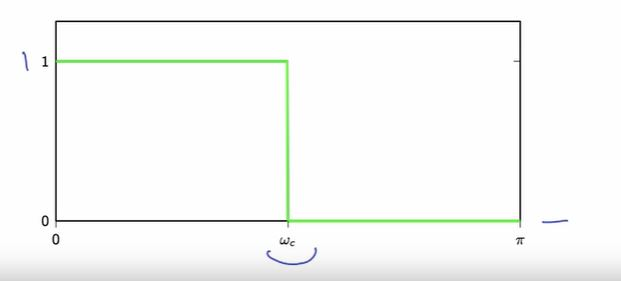

###### transition bands and magnitude tolerances
* $\omega_{p}$-end of passband
* $\omega_{s}$-start of stopband

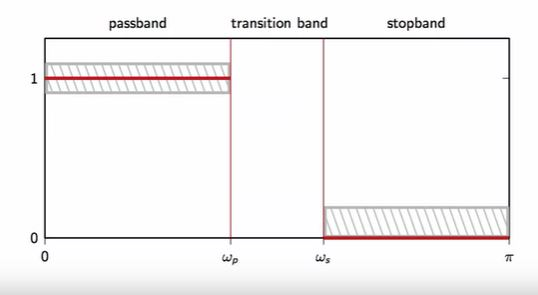

#### FIR or IIR 

##### IIR: pros and cons
**pros:** 
* computationally efficient. 
* can achieve a very strong attenuation in the stop band rather easily.
* can achieve a monotonic characteristic in the pass band(good for audio).

**cons:**
* they might have stability issues.
* difficult to design for arbitrary responses(not LP/HP).
* no linear phase.

##### IIR: pros and cons
**pros:**
* always stable.
* can be designed optimally
* can be designed with linear phase (very important in communication systems). 

**cons:**
* computationally more expensive.

##### The design methods
In order to find the appropriate filter CCDE:
* **IIR**- conversion of analog design.
* **FIR**- optimal minimax design.

#### Common IIR 

##### Butterworth lowpass
###### Magnitude response
* very flat
* monotonic in $[0,\pi]$
###### Design parameters
* order-N
* cutoff frequency-$\omega_{c}$
###### Test valued
* width of transition band
* passband error
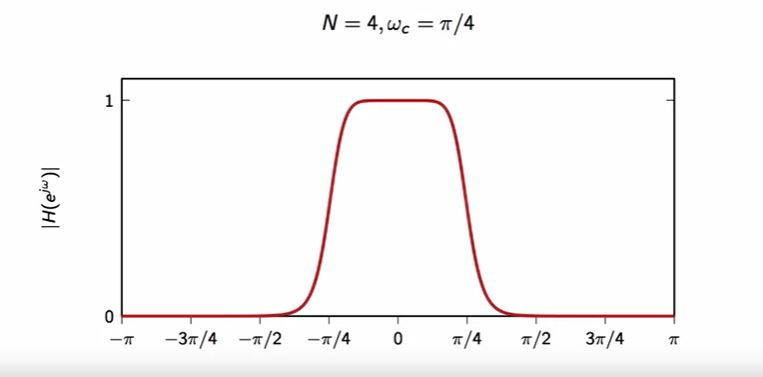

##### Chebyshev lowpass
###### Magnitude response
* equiripple in passband
* monotonic in stopband
###### Design parameters
* order-N
* cutoff frequency-$\omega_{c}$
* passband max-error
###### Test valued
* width of transition band
* stopband error
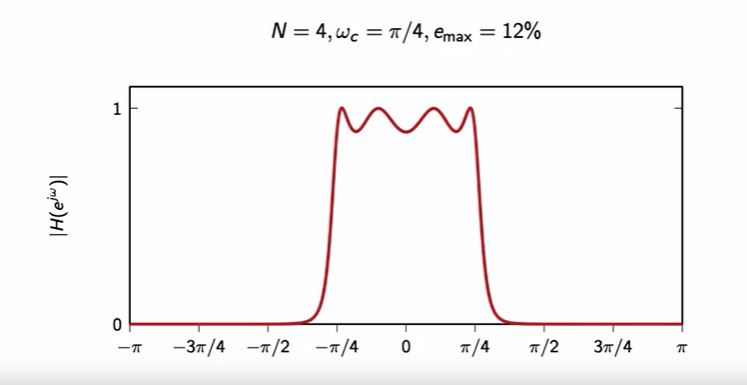

##### Elliptic lowpass
###### Magnitude response
* equiripple in passband and stopband
###### Design parameters
* order-N
* cutoff frequency-$\omega_{c}$
* passband max-error
* stopband min attenuation
###### Test valued
* width of transition band
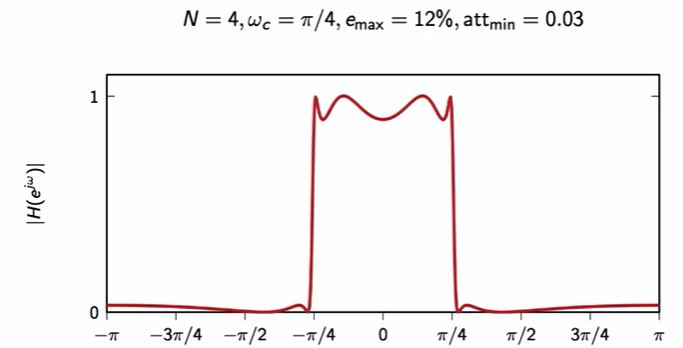

#### FIR design
##### Magnitude response
* equiripple in passband and stopband
##### Design parameters
* order-N
* passband edge-$\omega_{p}$
* stopband edge-$\omega_{s}$
* ratio of passband to stopband error $\frac{\delta_{p}}{\delta_{s}}$
##### Test valued
* passband max error
* stopband max error
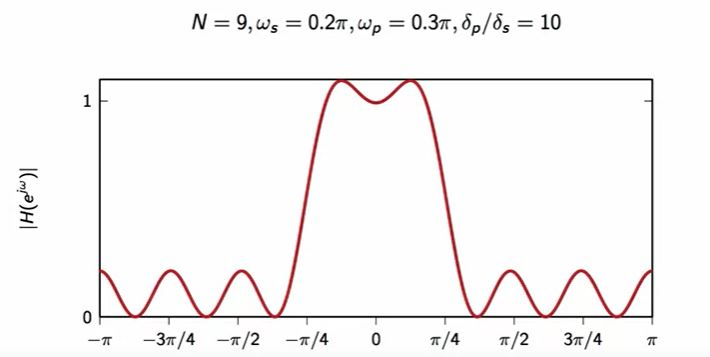

## Example:
will use sum of sines 
* sampled in fs=100[Hz]
* in an interval T=1

$ x[n]=cos(3*fs*N*2\pi)+cos(8*fs*N*2\pi)$

Will noises:
* white noise
* bias
* high-frequency unwanted component
* unwanted impulses

### imports

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy import signal as sig


### present signal

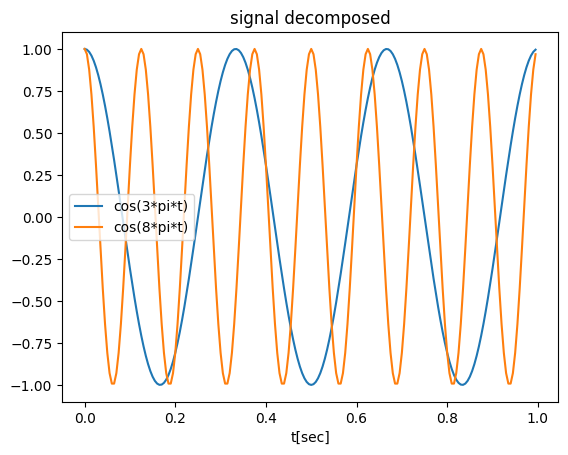

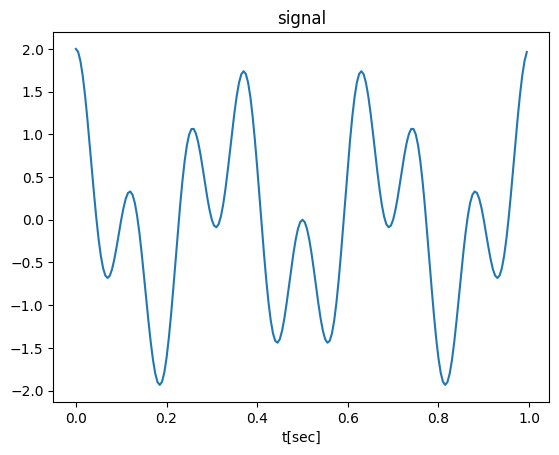

In [2]:
## time interval
T=1

## sampling frequency [Hz]
fs=200

## Number of samples
N=int(T*fs) 

## time vector
t=np.linspace(start=0,stop=T-1/fs,num=N)

## signal, 1 Hz = 2*pi rad/sec
f1,f2=3,8 #[Hz] or [cycle/sec]
w1,w2=f1*2*np.pi,f2*2*np.pi #[rad/sec]

x1=np.cos(t*w1)
x2=np.cos(t*w2)
x_signal=x1+x2

## present signal parts
plt.plot(t,x1,t,x2)
plt.title('signal decomposed')
plt.xlabel('t[sec]')
plt.legend(['cos(3*pi*t)','cos(8*pi*t)'])
plt.show()

## present composed signal 
plt.plot(t,x_signal)
plt.title('signal')
plt.xlabel('t[sec]')
plt.show()

### present noises 
* white noise
* bias
* high-frequency unwanted component
* unwanted impulses

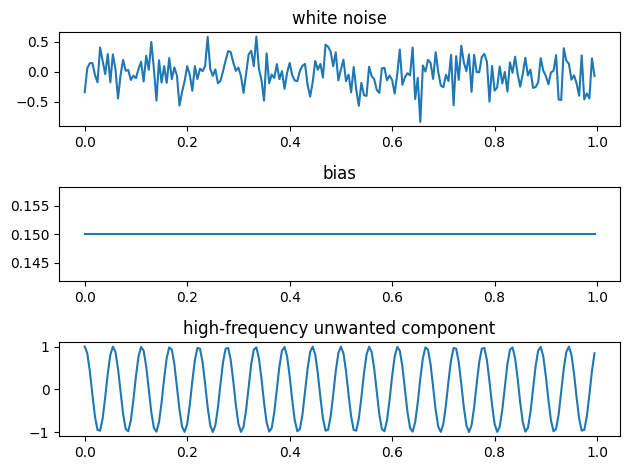

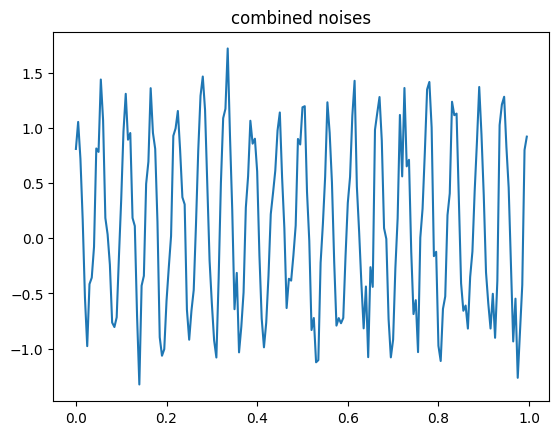

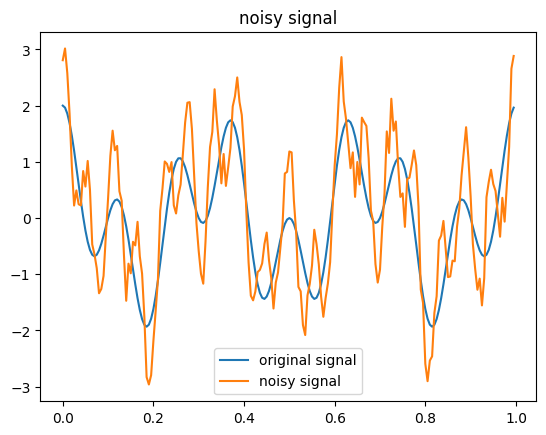

In [3]:
# white noise
mean = 0
std = 1 
white_noise_amp=0.25
white_noise = white_noise_amp*np.random.normal(mean, std, size=N)

# bias
bias_amp=0.15
bias=np.ones(N)*bias_amp

# high-frequency unwanted component
f_noise=18 #[Hz] or [cycle/sec]
w_noise=f_noise*2*np.pi#[rad/sec]
noise=np.cos(t*w_noise)



fx,ax=plt.subplots(3)
ax[0].plot(t,white_noise)
ax[0].set_title('white noise')
ax[1].plot(t,bias)
ax[1].set_title('bias')
ax[2].plot(t, noise)
ax[2].set_title('high-frequency unwanted component')
fx.tight_layout()
plt.show()

# all noises
combined_noises=white_noise+bias+noise
plt.plot(t,combined_noises)
plt.title('combined noises')
plt.show()

# noisy signal
noisy_signal=x_signal+combined_noises
plt.plot(t,x_signal,t,noisy_signal)
plt.title('noisy signal')
plt.legend(['original signal','noisy signal'])
plt.show()

### analize signal with DFT

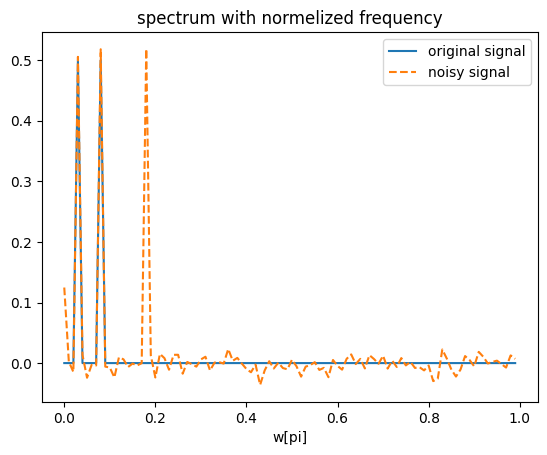

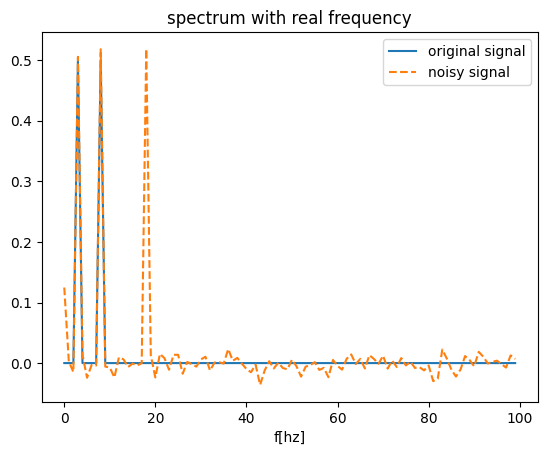

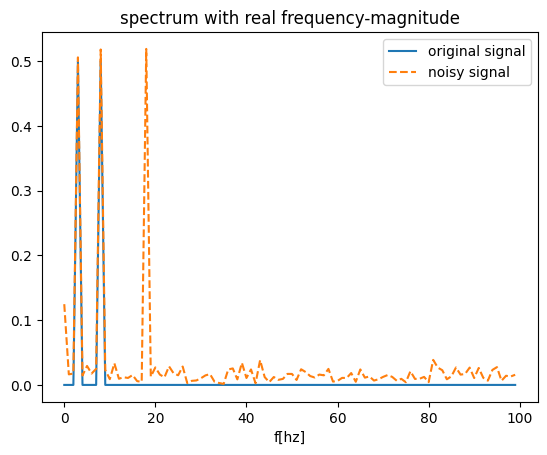

In [4]:
## the frequency vector

### frequency vector length
n=len(x_signal)

### normelized frequency
d=1/(2*np.pi)
fn=fftfreq(n,d)/np.pi

### real frequency
d=1/fs
f=fftfreq(n,d)

## the DFT 
X=fft(x_signal,norm="forward")
X_noisy=fft(noisy_signal,norm="forward")

## present spectrums
plt.plot(fn[:len(f)//2],X[:len(f)//2].real)
plt.plot(fn[:len(f)//2],X_noisy[:len(f)//2].real,'--')
plt.title('spectrum with normelized frequency')
plt.xlabel('w[pi]')
plt.legend(['original signal','noisy signal'])
# plt.xlim([0,])
plt.show()

plt.plot(f[:len(f)//2],X[:len(f)//2].real)
plt.plot(f[:len(f)//2],X_noisy[:len(f)//2].real,'--')
plt.title('spectrum with real frequency')
plt.legend(['original signal','noisy signal'])
plt.xlabel('f[hz]')
# plt.xlim([0,5])
plt.show()

plt.plot(f[:len(f)//2],np.abs(X[:len(f)//2]))
plt.plot(f[:len(f)//2],np.abs(X_noisy[:len(f)//2]),'--')
plt.title('spectrum with real frequency-magnitude')
plt.legend(['original signal','noisy signal'])
plt.xlabel('f[hz]')
# plt.xlim([0,5])
plt.show()


### Define wanted specifications
We woluld like a passband in the range of $[2, 10]$ Hz

### Apply IIR's

#### Butterworth

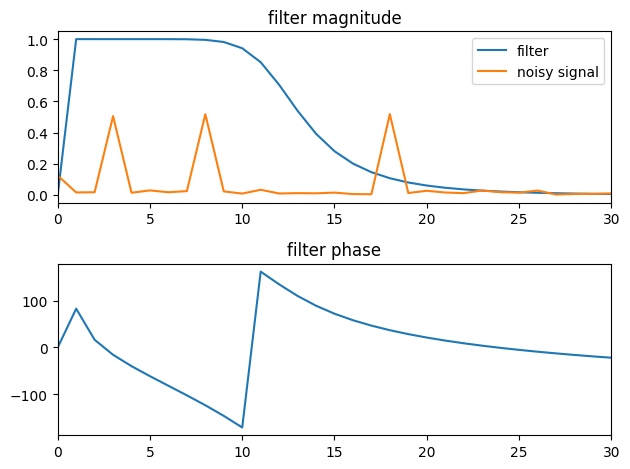

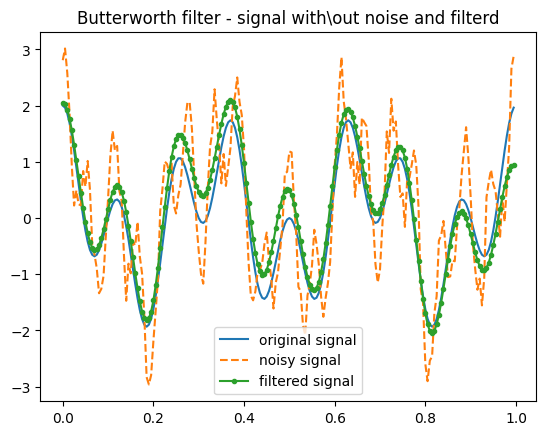

In [5]:
# order
order=5

# critical frequencies
Wn=[0.5,12]

# filter design
b,a=sig.butter(N=order, Wn=Wn, btype='bandpass', analog=False, output='ba', fs=fs)

# calculate filter frequncy response
w,h=sig.freqz(b=b,a=a, worN=f[:len(f)//2], whole=False, plot=None, fs=fs, include_nyquist=False)

# present filter frequency response
fx,ax=plt.subplots(2)
ax[0].plot(w,np.abs(h),w,np.abs(X_noisy[:len(f)//2]))
ax[0].legend(['filter','noisy signal'])
ax[0].set_title('filter magnitude')
ax[0].set_xlim([0,30])

ax[1].plot(w,np.angle(h,deg=True))
ax[1].set_title('filter phase')
ax[1].set_xlim([0,30])
fx.tight_layout()
plt.show()

# filter the noisy signal
filtered_signal=sig.filtfilt(b, a, noisy_signal,padtype='even',padlen=100)

# show results
plt.plot(t,x_signal,t,noisy_signal,'--',t,filtered_signal,'.-')
plt.title('Butterworth filter - signal with\out noise and filterd')
plt.legend(['original signal','noisy signal','filtered signal'])
plt.show()

#### Chebishev

rp_gain 1.2
rp 1.5836249209524964


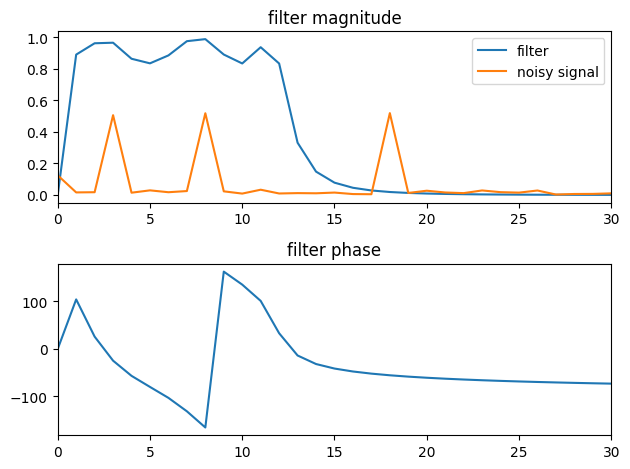

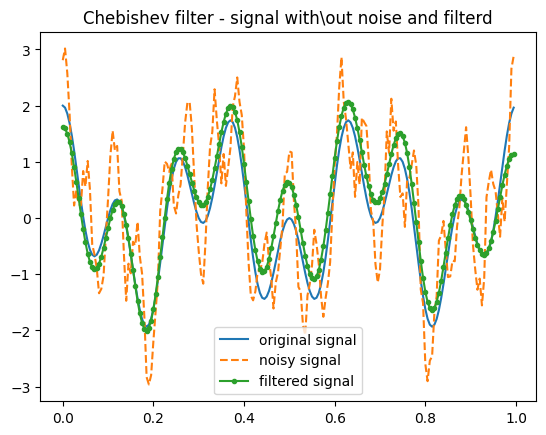

In [6]:
# order
order=5

# maximum ripple in passband [db] dB = 20log₁₀(gain)
rp_gain=1.2
rp=20*np.log10(rp_gain)
print('rp_gain',rp_gain)
print('rp',rp)


# critical frequencies
Wn=[0.5,12]

# filter design
b,a=sig.cheby1(N=order, rp=rp, Wn=Wn, btype='bandpass', analog=False, output='ba', fs=fs)

# calculate filter frequncy response
w,h=sig.freqz(b=b,a=a, worN=f[:len(f)//2], whole=False, plot=None, fs=fs, include_nyquist=False)

# present filter frequency response
fx,ax=plt.subplots(2)
ax[0].plot(w,np.abs(h),w,np.abs(X_noisy[:len(f)//2]))
ax[0].legend(['filter','noisy signal'])
ax[0].set_title('filter magnitude')
ax[0].set_xlim([0,30])

ax[1].plot(w,np.angle(h,deg=True))
ax[1].set_title('filter phase')
ax[1].set_xlim([0,30])
fx.tight_layout()
plt.show()

# filter the noisy signal
filtered_signal=sig.filtfilt(b, a, noisy_signal,padtype='even',padlen=100)

# show results
plt.plot(t,x_signal,t,noisy_signal,'--',t,filtered_signal,'.-')
plt.title('Chebishev filter - signal with\out noise and filterd')
plt.legend(['original signal','noisy signal','filtered signal'])
plt.show()

#### Elliptic

rp_gain 1.2
rp 1.5836249209524964
rs_gain 0.1
rs 20.0


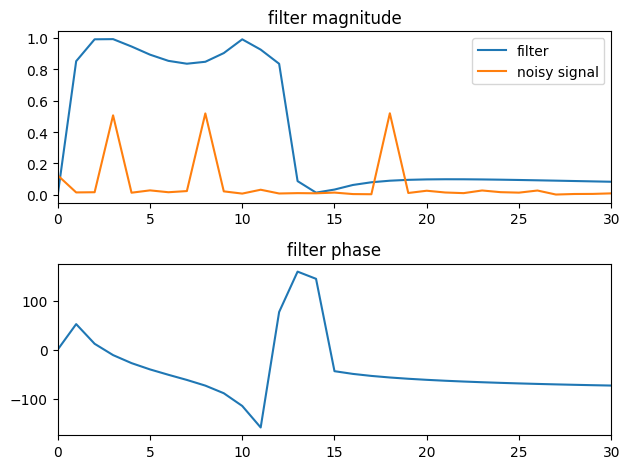

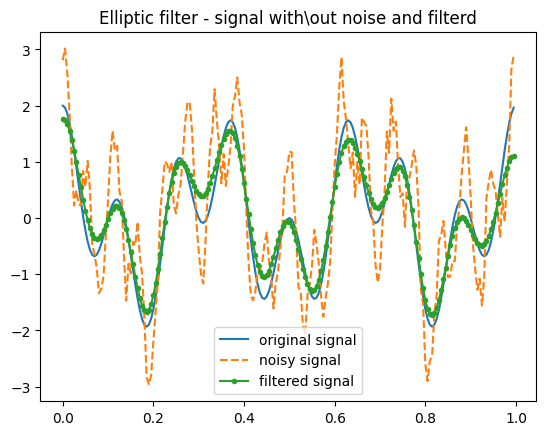

In [7]:
# order
order=5

# maximum ripple in passband [db] dB = 20log₁₀(gain)
rp_gain=1.2
rp=20*np.log10(rp_gain/1)
print('rp_gain',rp_gain)
print('rp',rp)

# minimum attenuation in stopband [db]
rs_gain=0.1
rs=20*np.log10(1/rs_gain)
print('rs_gain',rs_gain)
print('rs',rs)


# critical frequencies
Wn=[0.5,12]

# filter design
b,a=sig.ellip(N=order, rp=rp, rs=rs, Wn=Wn, btype='bandpass', analog=False, output='ba', fs=fs)

# calculate filter frequncy response
w,h=sig.freqz(b=b,a=a, worN=f[:len(f)//2], whole=False, plot=None, fs=fs, include_nyquist=False)

# present filter frequency response
fx,ax=plt.subplots(2)
ax[0].plot(w,np.abs(h),w,np.abs(X_noisy[:len(f)//2]))
ax[0].legend(['filter','noisy signal'])
ax[0].set_title('filter magnitude')
ax[0].set_xlim([0,30])

ax[1].plot(w,np.angle(h,deg=True))
ax[1].set_title('filter phase')
ax[1].set_xlim([0,30])
fx.tight_layout()
plt.show()

# filter the noisy signal
filtered_signal=sig.filtfilt(b, a, noisy_signal,padtype='even',padlen=100)

# show results
plt.plot(t,x_signal,t,noisy_signal,'--',t,filtered_signal,'.-')
plt.title('Elliptic filter - signal with\out noise and filterd')
plt.legend(['original signal','noisy signal','filtered signal'])
plt.show()

### Apply FIR

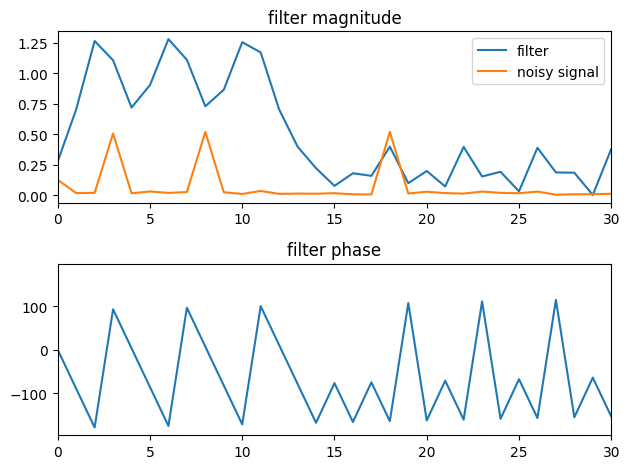

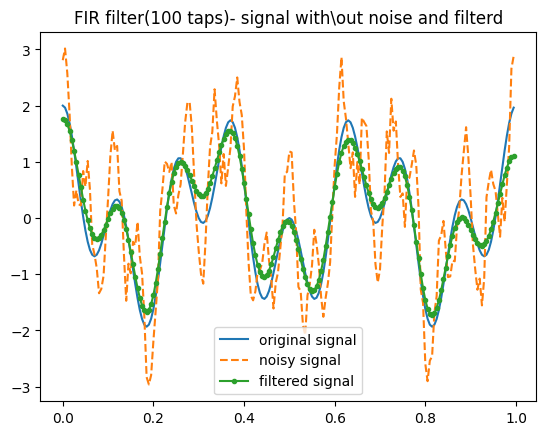

In [8]:
# number of taps-order of the filter
numtaps=100

# bands- bands limit
bands=[0,0.5,1,12,13,0.5*fs]

# desired- gains wanted in each band
desired=[0.1, 1,0.1]

# type- type of filter
type='bandpass'

# filter design
taps=sig.remez(numtaps=numtaps, bands=bands,\
              desired=desired, type=type,\
              maxiter=25, grid_density=16, fs=fs)

# calculate filter frequncy response
w,h=sig.freqz(b=taps,a=[1], worN=f[:len(f)//2], whole=False, plot=None, fs=fs, include_nyquist=False)

# present filter frequency response
fx,ax=plt.subplots(2)
ax[0].plot(w,np.abs(h),w,np.abs(X_noisy[:len(f)//2]))
ax[0].legend(['filter','noisy signal'])
ax[0].set_title('filter magnitude')
ax[0].set_xlim([0,30])

ax[1].plot(w,np.angle(h,deg=True))
ax[1].set_title('filter phase')
ax[1].set_xlim([0,30])
fx.tight_layout()
plt.show()

# filter the noisy signal
filtered_signal=sig.filtfilt(b, a, noisy_signal,padtype='even',padlen=100)

# show results
plt.plot(t,x_signal,t,noisy_signal,'--',t,filtered_signal,'.-')
plt.title('FIR filter(100 taps)- signal with\out noise and filterd')
plt.legend(['original signal','noisy signal','filtered signal'])
plt.show()

## Appendix

### phase and magnitude

#### np.absolute(x, out=None, where=True)
Calculate the absolute value element-wise.
##### input
* **x**- input array
##### output
* **absolute**- output
##### notes
for complex input $a+j\cdot b$ the output is $\sqrt{a^{2}+b^{2}}$ 

#### np.angle(z, deg=False)
Return the angle of the complex argument.
##### input
* **z**- A complex number or sequence of complex numbers.
* **deg**- Return angle in degrees if True, radians if False (default).
##### output
* **angle**- The counterclockwise angle from the positive real axis on the complex plane in the range (-pi, pi], with dtype as numpy.float64.
##### notes

#### np.unwrap(p, discont=None, axis=-1, *, period=6.283185307179586)
For the default case where period is $2\pi$ and discont is $\pi$, this unwraps a radian phase p such that adjacent differences are never greater than $\pi$ by adding $2\pi\cdot k$ for some int k. 
##### input
* **p**- input array
* **discont**- Maximum discontinuity between values, default is period/2.
* **period**-
##### output
* **out**- output array 
##### notes
discont cant be smaller than period/2 and will be rounded up.

* if **input[i+1]>input[i]+discont**-->output[i+1]=input[i+1]-k*period(k will be the integer that will bring abs(output[i+1]-input[i])<discont
##### example
                                                                                                                                               
np.unwrap([0, 1, 2, -1, 0], period=4) #which means discont is period/2 
                                                                                                                                               
**result**: array([0, 1, 2, 3, 4])# abs(input[3]-input[2])=3>period/2=2-->output[3]=input[3]+period=3

### z-transform

#### np.polymul(a1, a2)
Find the product of two polynomials (or for us 2 transfer-functions).
##### input
* **a1**- array of polynomial1 coefficients.
* **a2**- array of polynomial2 coefficients.
##### output
* **out**- The polynomial resulting from the multiplication of the inputs. it is a 1D array of polynomial coefficients from highest to lowest degree.
##### notes
polynomial coefficients from highest to lowest degree.

#### scipy.signal.tf2zpk(b,a)
calculate poles and zeros based on transfer-function.
##### input
* **b**-Numerator polynomial coefficients
* **a**-Denominator polynomial coefficients
##### output
* **z**-zeros of the transfer-function
* **p**-poles of the transfer-function
* **k**-gain of the transfer-function
##### notes
The expected coefficients are related to:
$H(z)=\frac{b_{0}\cdot z^{M}+b_{1}\cdot z^{M-1}+...+b_{M}}{a_{0}\cdot z^{N}+a_{1}\cdot z^{N-1}+...+a_{N}}$

#### signal.freqz(b=b,a=1, worN=512, whole=True, plot=None, fs=6.28, include_nyquist=False)
Compute the frequency response of a digital filter.
##### input
* **b**-Numerator of a linear filter.
* **a**-Denominator of a linear filter.
* **worN**-
  1. **if an array**:compute the response at the array values(assumed to be the same unit as fs).
  2. **if an integer**: sample equally the $[0,f_{s}]$ or  $[0,\frac{f_{s}}{2}]$ (depend on "whole" value).
* **whole**-
  1. **if True**:compute response on the $[0,f_{s}]$ range.
  2. **if False**: compute response on the $[0,\frac{f_{s}}{2}]$ range.
* **fs**-The sampling frequency of the digital system. Defaults to 2*pi radians/sample (so w is from 0 to pi).
* **include_nyquist**-If whole is False and worN is an integer, setting to True will include the last frequency (Nyquist frequency).
##### output
* **w**-The frequencies at which h was computed, in the same units as fs.
* **h**-The frequency response, as complex numbers.
##### notes

### filters

##### signal.filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)
Apply a digital filter forward and backward to a signal.

This function applies a linear digital filter twice, once forward and once backwards. The combined filter has zero phase and a filter order twice that of the original.
##### input
* **b**- The numerator coefficient vector in a 1-D sequence.
* **a**-The denominator coefficient vector in a 1-D sequence.
* **x**- input signal
* **axis**- 
* **padtype**- This determines the type of extension to use for the padded signal to which the filter is applied,{'odd','even,'constant'}.
* **padlen**- The number of elements by which to extend x at both ends of axis before applying the filter
* **method**- for us now,always 'pad'.
* **irlen**- Not relevent when method='pad'.
##### output
* **y**- filtered output
##### notes

##### signal.lfilter(b, a, x, axis=-1, zi=None)

##### input
* **b**- The numerator coefficient vector in a 1-D sequence.
* **a**-The denominator coefficient vector in a 1-D sequence.
* **x**- input signal
* **axis**- 
* **zi**- initial condition **not relevant now**
##### output
* **y**- filterd output
##### notes
If a[0] is not 1, then both a and b are normalized by a[0].

The filter inplements the CCDE:

a[0]*y[n] = b[0]*x[n] + b[1]*x[n-1] + ... + b[M]*x[n-M]
                      - a[1]*y[n-1] - ... - a[N]*y[n-N]

#### IIR design

##### signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
Butterworth digital and analog filter design.

Design an Nth-order digital or analog Butterworth filter and return the filter coefficients.
##### input
* **N**- order of filter
* **Wn**- The critical frequency or frequencies. For lowpass and highpass filters, Wn is a scalar; for bandpass and bandstop filters, Wn is a length-2 sequence.
* **btype**-{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}
* **analog**- When True, return an analog filter, otherwise a digital filter is returned.
* **output**- {‘ba’, ‘zpk’, ‘sos’}, type of output.
* **fs**- The sampling frequency of the digital system.
##### output
* **b, a**-Numerator (b) and denominator (a) polynomials of the IIR filter.
* **z, p, k**- Zeros, poles, and system gain of the IIR filter transfer function.
* **sos**-
##### notes

##### signal.cheby1(N, rp, Wn, btype='low', analog=False, output='ba', fs=None)
hebyshev type I digital and analog filter design.
##### input
* **N**- The order of the filter.
* **rp**- The maximum ripple allowed below unity gain in the passband. Specified in decibels, as a positive number.
* **Wn**- A scalar or length-2 sequence giving the critical frequencies. For Type I filters, this is the point in the transition band at which the gain first drops below -rp.
For digital filters, Wn are in the same units as fs. 
* **btype**- {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}
* **analog**- When True, return an analog filter, otherwise a digital filter is returned.
* **output**- {‘ba’, ‘zpk’, ‘sos’}
* **fs**- The sampling frequency of the digital system.
##### output
* **b, a**-Numerator (b) and denominator (a) polynomials of the IIR filter.
* **z, p, k**- Zeros, poles, and system gain of the IIR filter transfer function.
* **sos**-
##### notes

##### signal.ellip(N, rp, rs, Wn, btype='low', analog=False, output='ba', fs=None)
Elliptic (Cauer) digital and analog filter design.
##### input
* **N**- The order of the filter.
* **rp**- The maximum ripple allowed below unity gain in the passband. Specified in decibels, as a positive number.
* **rs**- The minimum attenuation required in the stop band. Specified in decibels, as a positive number.
* **Wn**- A scalar or length-2 sequence giving the critical frequencies. For elliptic filters, this is the point in the transition band at which the gain first drops below -rp.
For digital filters, Wn are in the same units as fs. By default, fs is 2 half-cycles/sample, so these are normalized from 0 to 1, where 1 is the Nyquist frequency.
* **btype**- {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}
* **analog**-When True, return an analog filter, otherwise a digital filter is returned.
* **output**- {‘ba’, ‘zpk’, ‘sos’}
* **fs**- The sampling frequency of the digital system.
##### output
* **b, a**-Numerator (b) and denominator (a) polynomials of the IIR filter.
* **z, p, k**- Zeros, poles, and system gain of the IIR filter transfer function.
* **sos**- 
##### notes

#### FIR design

##### signal.remez(numtaps, bands, desired, weight=None, Hz=None, type='bandpass', maxiter=25, grid_density=16, fs=None)
Calculate the minimax optimal filter using the Remez exchange algorithm.
##### input
* **numtaps**- The desired number of taps in the filter. The number of taps is the number of terms in the filter, or the filter order plus one.
* **bands**- A monotonic sequence containing the band edges. All elements must be non-negative and less than half the sampling frequency as given by fs.
* **desired**- A sequence half the size of bands containing the desired gain in each of the specified bands.
* **weight**- A relative weighting to give to each band region. The length of weight has to be half the length of bands.
* **Hz**- The sampling frequency in Hz. Default is 1.
* **type**- {‘bandpass’, ‘differentiator’, ‘hilbert’}
* **maxiter**- Maximum number of iterations of the algorithm. Default is 25.
* **grid_density**- Grid density. The dense grid used in remez is of size (numtaps + 1) * grid_density. Default is 16.
* **fs**- The sampling frequency of the signal. Default is 1.
##### output
* **out**- A rank-1 array containing the coefficients of the optimal (in a minimax sense) filter.
##### notes
The type of filter:

‘bandpass’ : flat response in bands. This is the default.

‘differentiator’ : frequency proportional response in bands.

‘hilbert’filter with odd symmetry, that is, type III
(for even order) or type IV (for odd order) linear phase filters.